In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
Crop_df = pd.read_csv("/content/Crop_Recommendation.csv")

In [3]:
Crop_df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
Crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
Crop_df.shape

(2200, 8)

In [6]:
missing_values = Crop_df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [7]:
Crop_df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


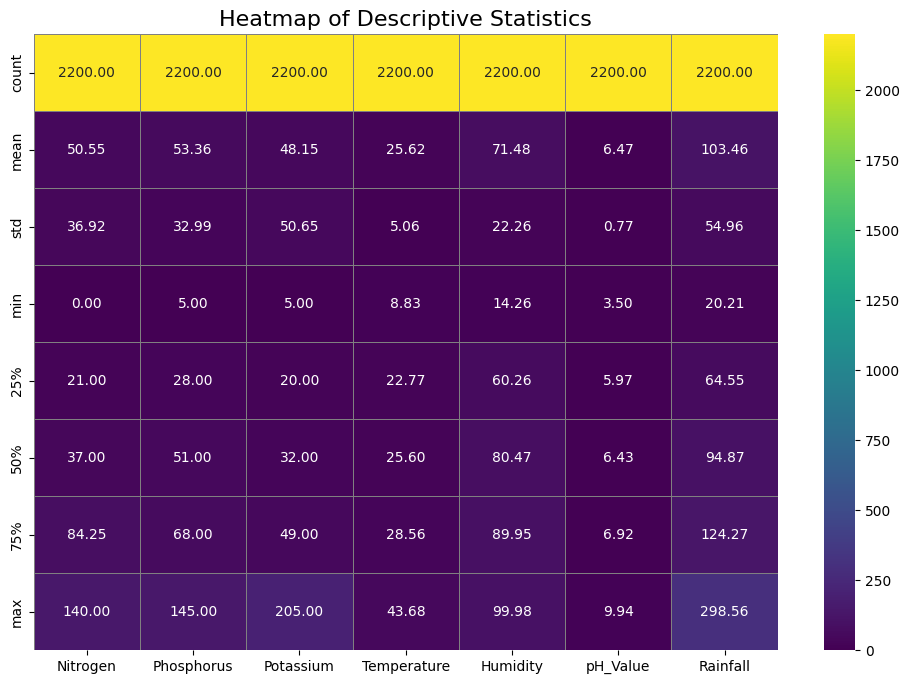

In [8]:
desc_stats = Crop_df.describe()

plt.figure(figsize=(12, 8))
sns.heatmap(desc_stats, annot=True, fmt=".2f", cmap='viridis', linewidths=.5, linecolor='gray')

plt.title('Heatmap of Descriptive Statistics', fontsize=16)
plt.show()


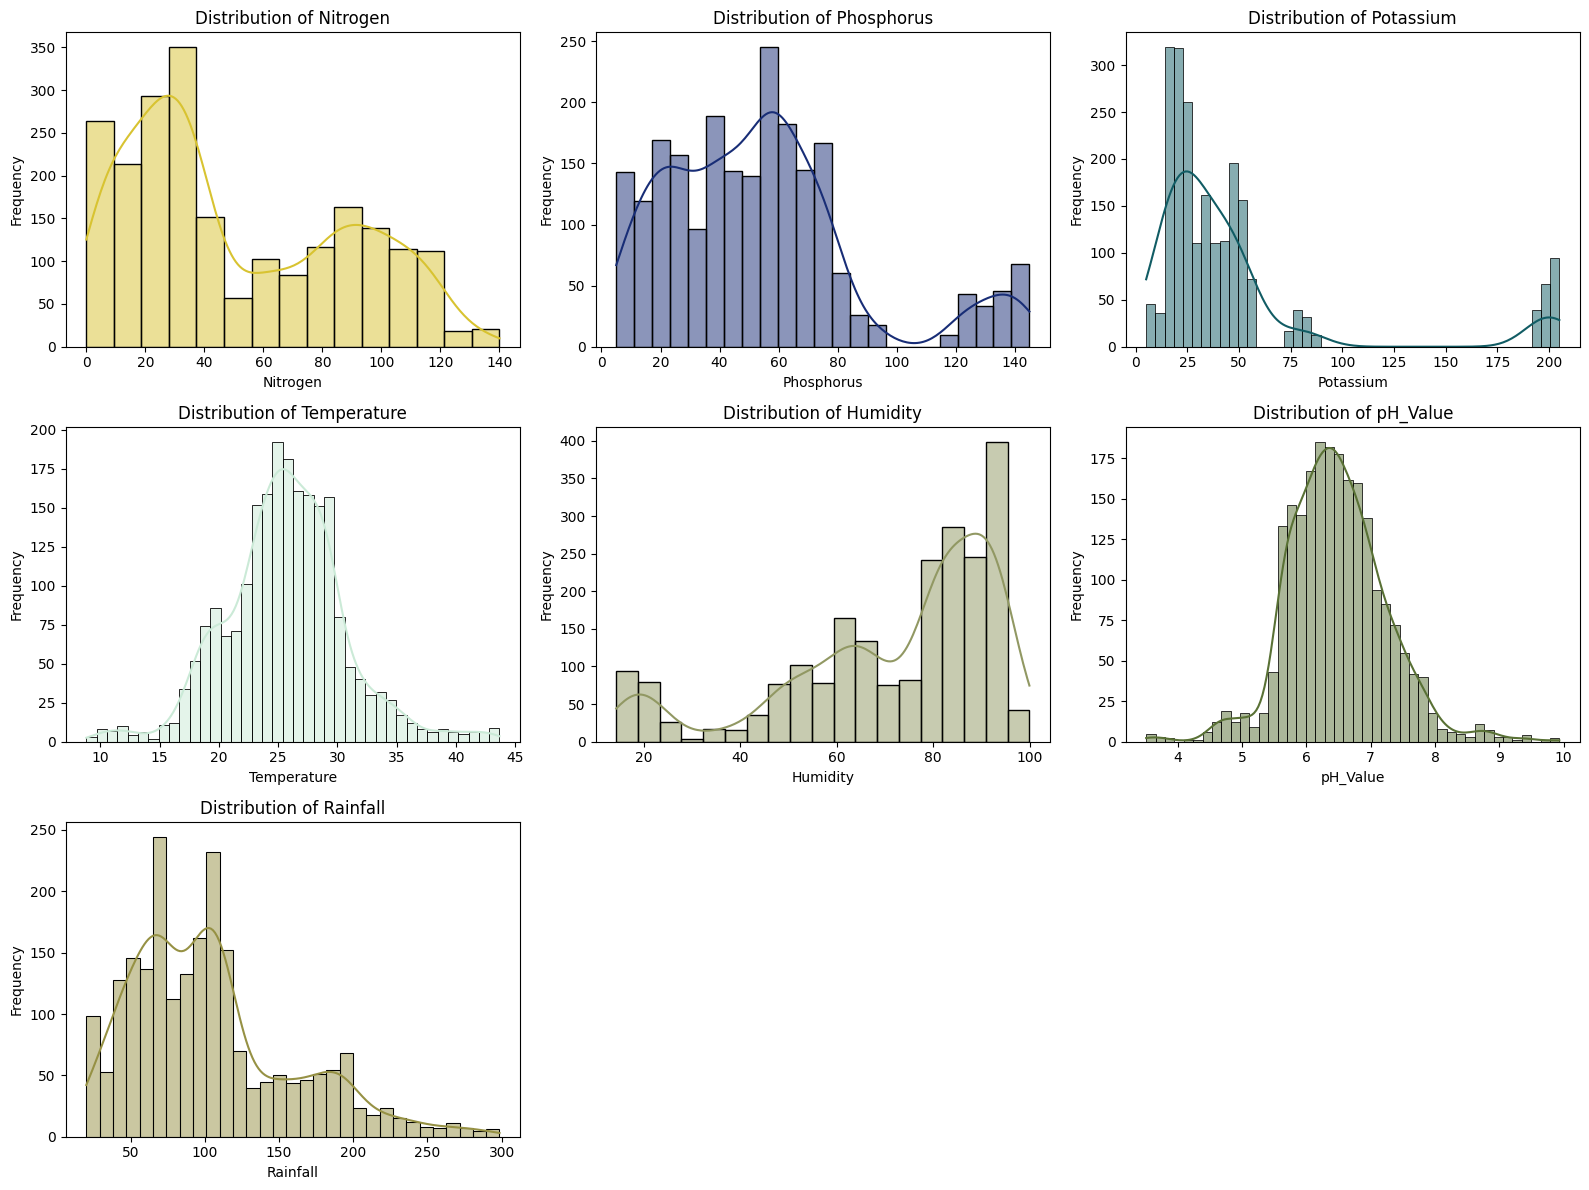

In [9]:
columns_to_visualize = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

plt.figure(figsize=(16, 12))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.histplot(Crop_df[column], kde=True, color=np.random.rand(3,))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px
px.bar(Crop_df,x='Crop',y='Rainfall', color='Crop')

In [11]:
Crop_df['Crop'].value_counts()

,count
Crop,
Rice,100
Maize,100
Jute,100
Cotton,100
Coconut,100
Papaya,100
Orange,100
Apple,100
Muskmelon,100


In [12]:
crop_summary = pd.pivot_table(Crop_df, index=['Crop'], aggfunc='mean')
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH_Value
Crop,,,,,,,
Apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
Banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
Blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
ChickPea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
Coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
Coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
Cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
Grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
Jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778


<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

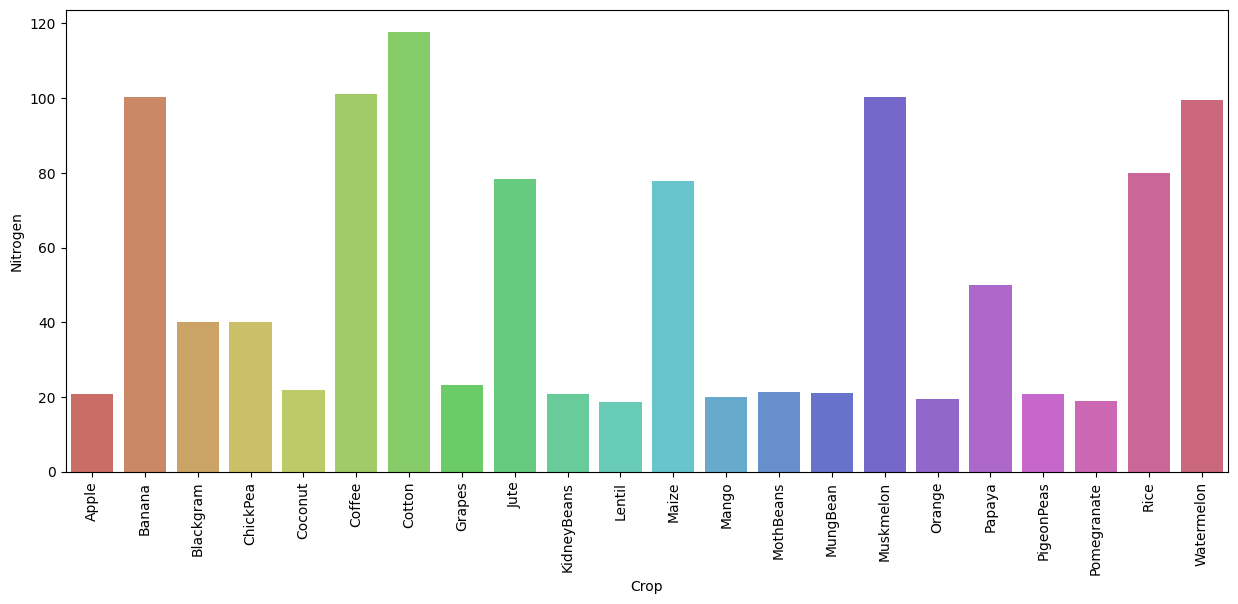

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

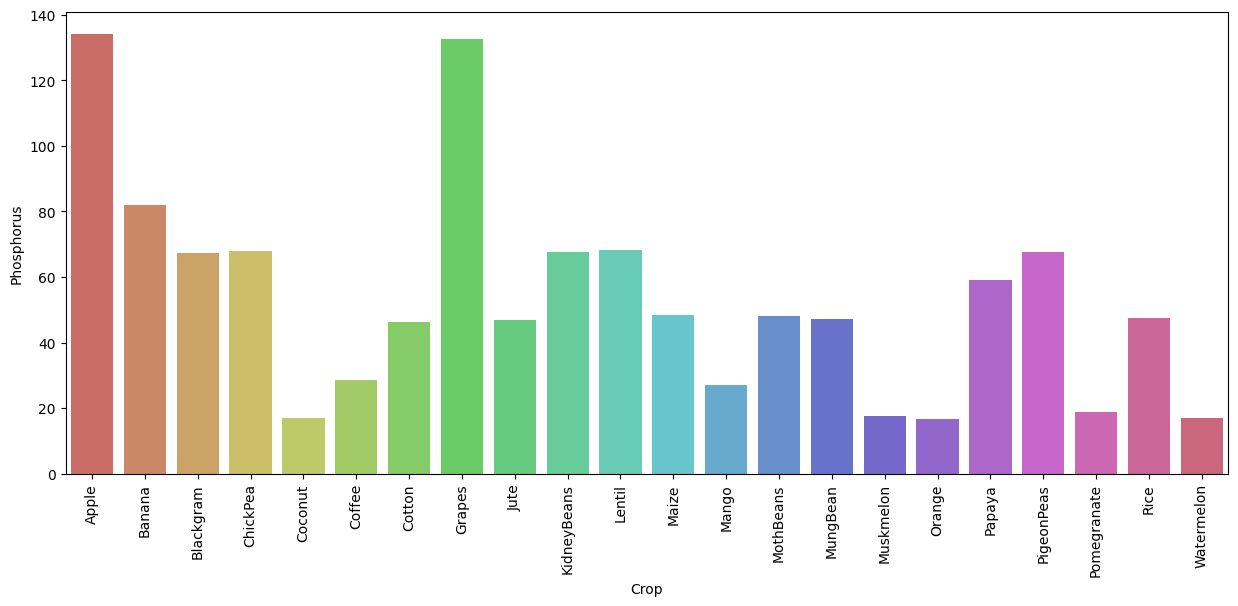

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

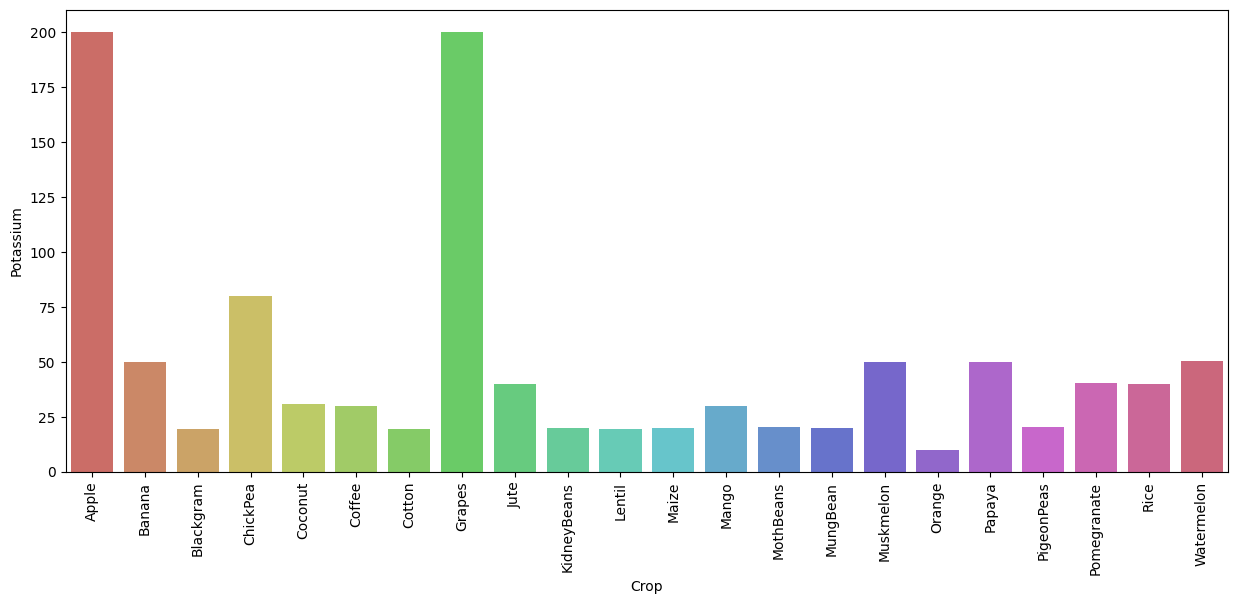

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

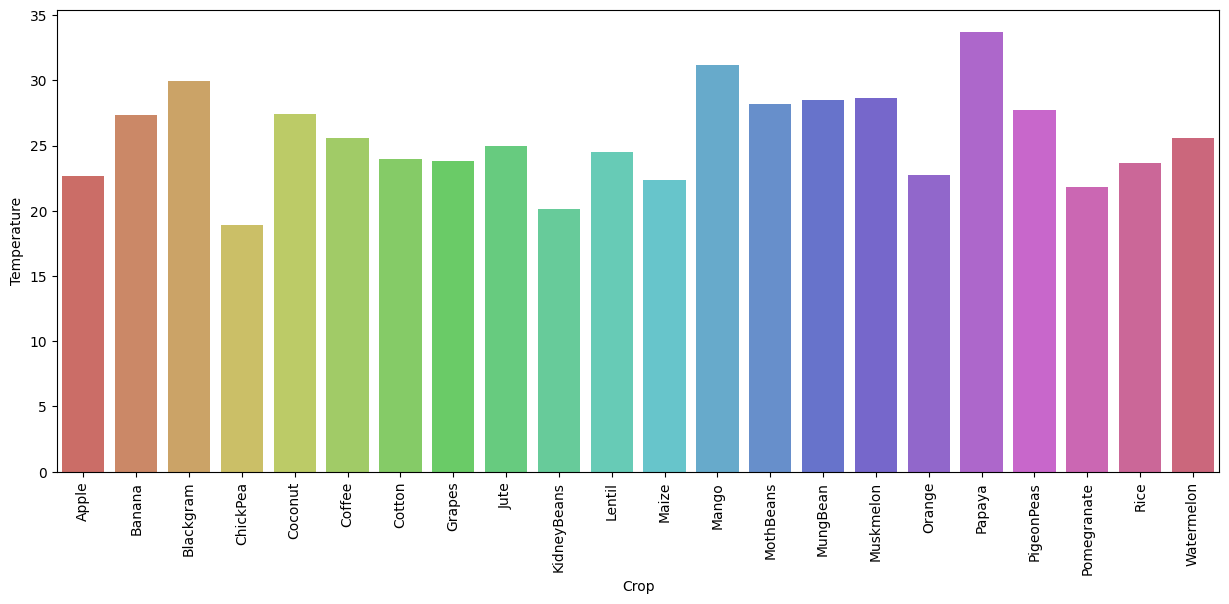

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

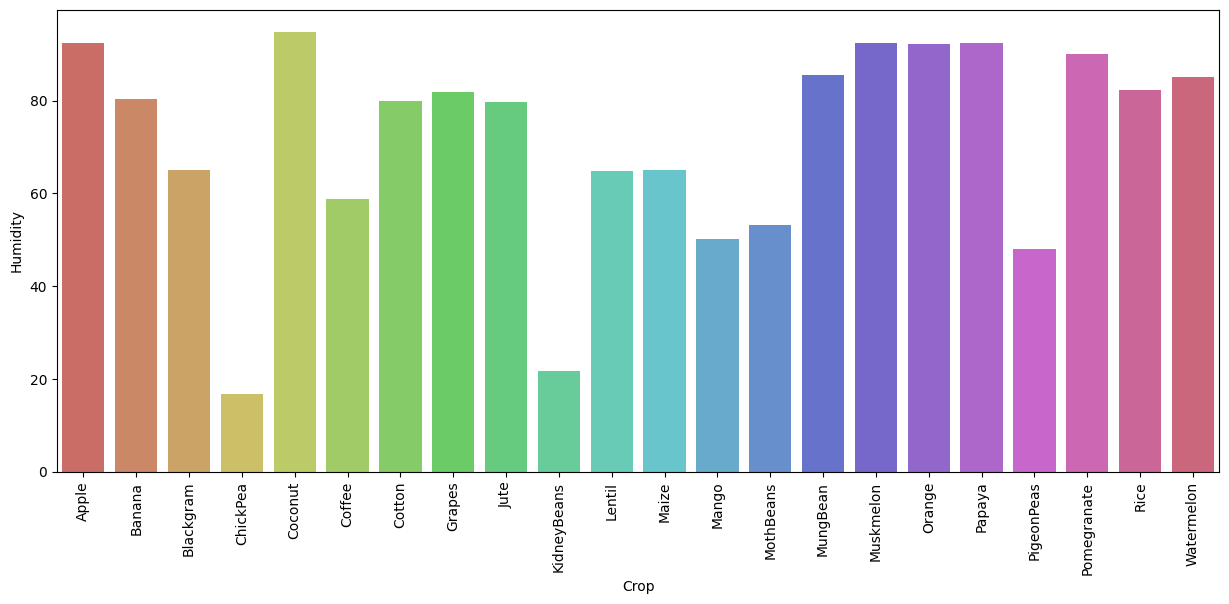

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

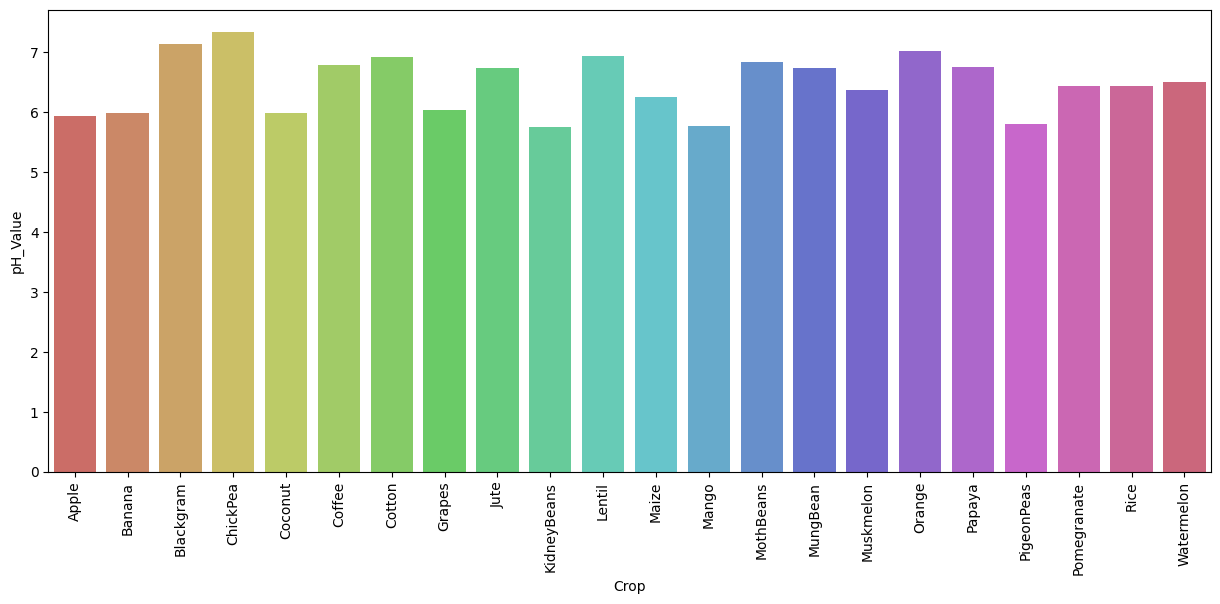

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

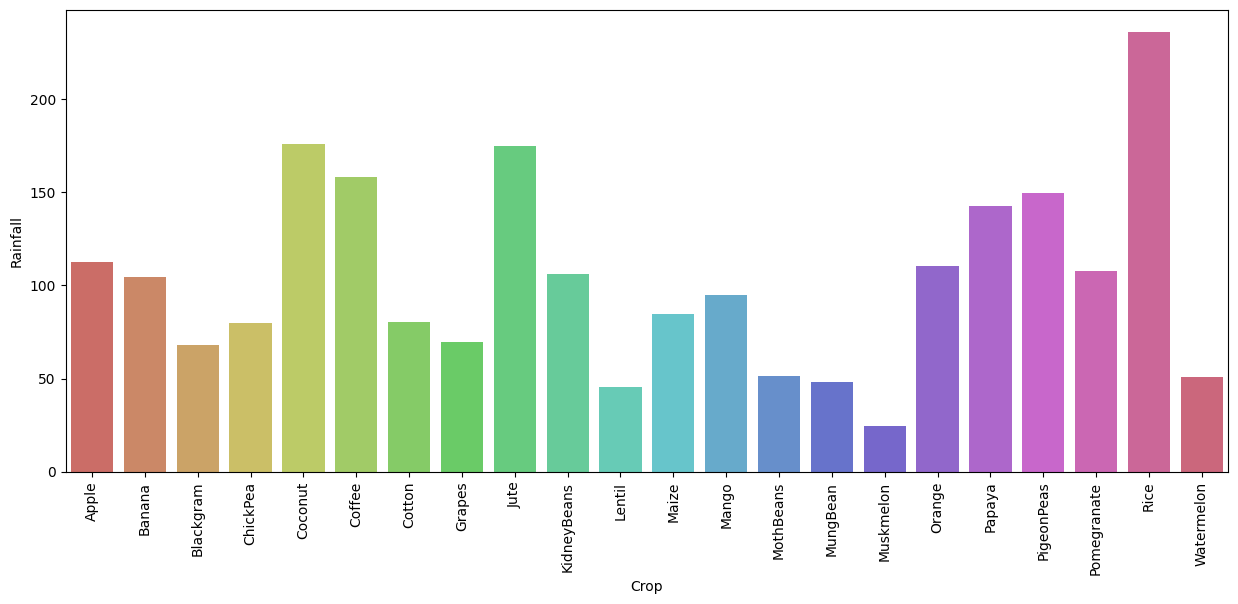

<ipython-input-13-e80b1217622d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

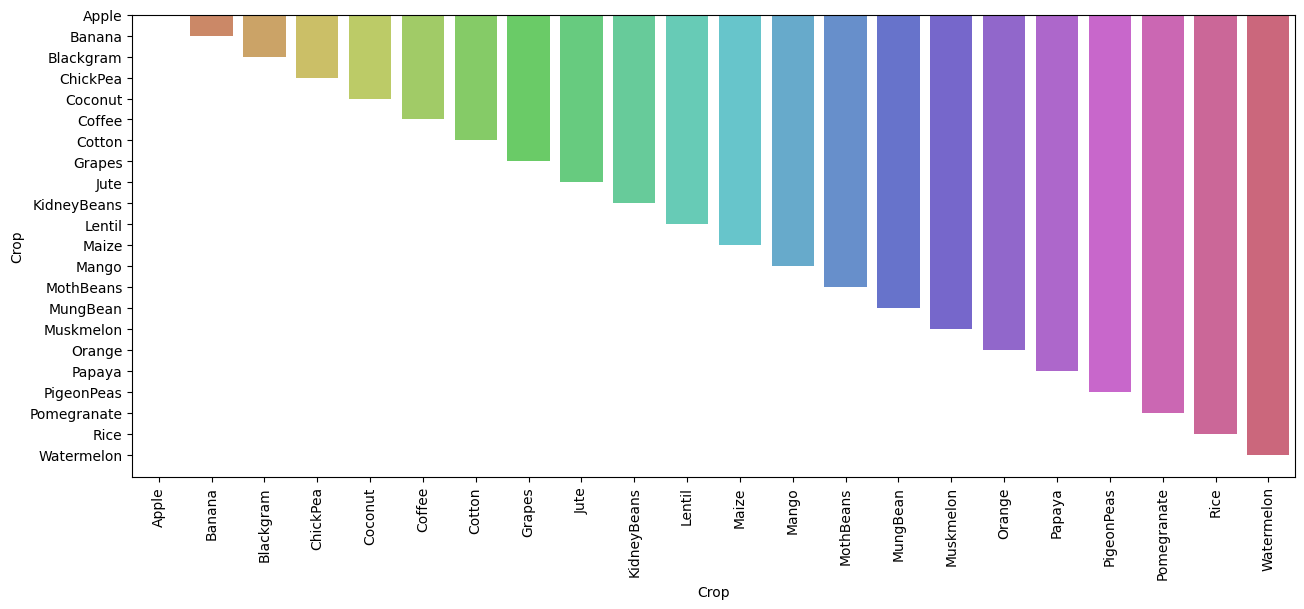

In [13]:
for i in Crop_df.columns:

    plt.figure(figsize = (15, 6))

    sns.barplot(x = 'Crop', y = i, data = crop_summary, palette = 'hls')

    plt.xticks(rotation = 90)

    plt.show()

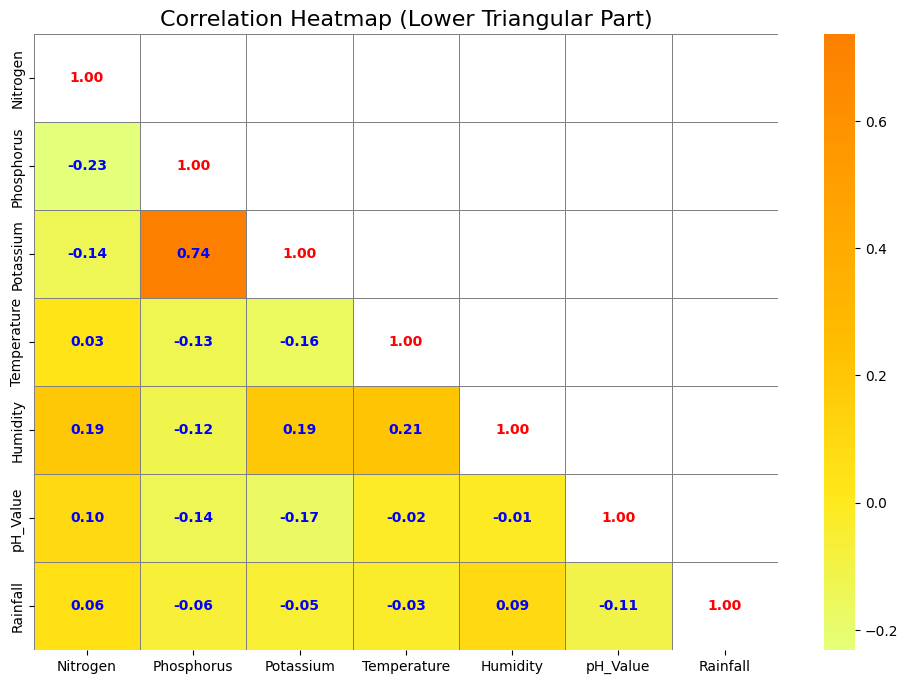

In [14]:
numerical_df = Crop_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='Wistia', linewidths=.5, linecolor='gray',
            annot_kws={"size": 10, "weight": "bold", "color": "blue"})

for i in range(len(corr_matrix.columns)):
    plt.text(i + 0.5, i + 0.5, f'{corr_matrix.iloc[i, i]:.2f}', ha='center', va='center', color='red', fontsize=10, weight='bold',
             bbox=dict(facecolor='white', edgecolor='none'))

plt.title('Correlation Heatmap (Lower Triangular Part)', fontsize=16)
plt.show()


Outlier Detection and Treatment

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed 

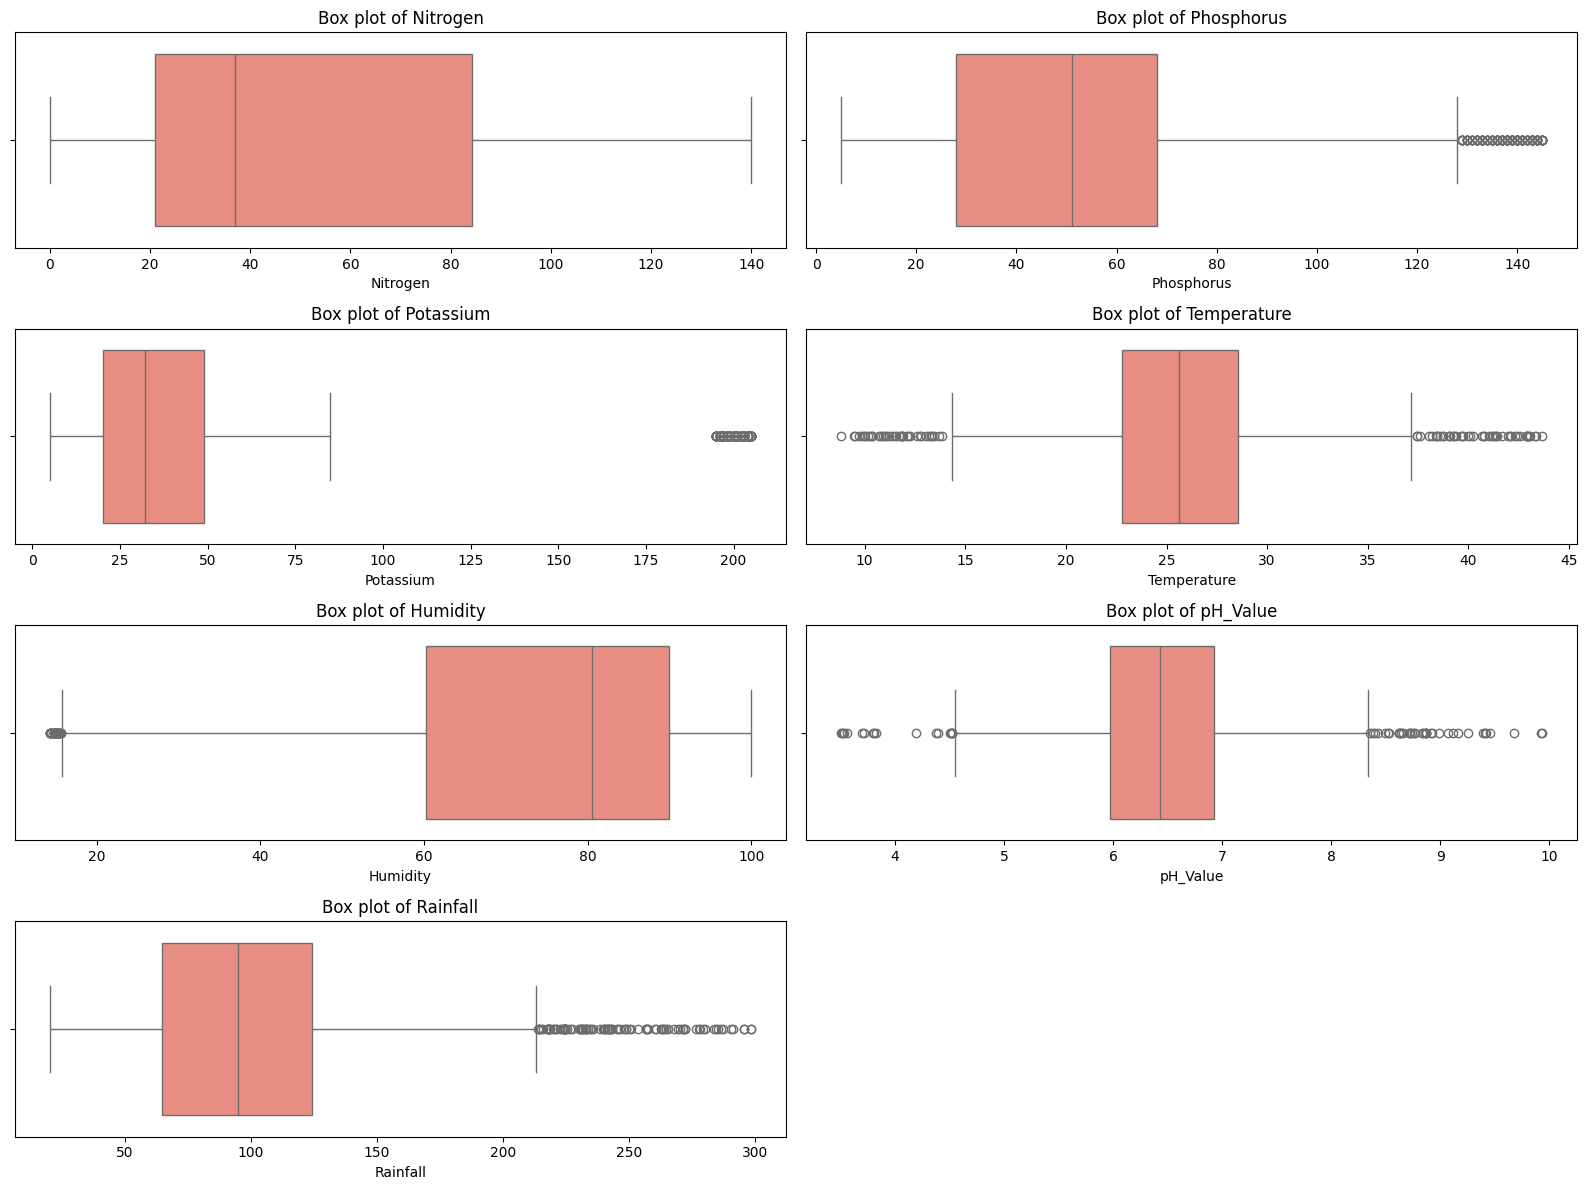

In [15]:
columns_to_visualize = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

num_rows = len(columns_to_visualize) // 2 + len(columns_to_visualize) % 2
num_cols = 2

plt.figure(figsize=(16, 12))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=Crop_df[column], color='salmon')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed 

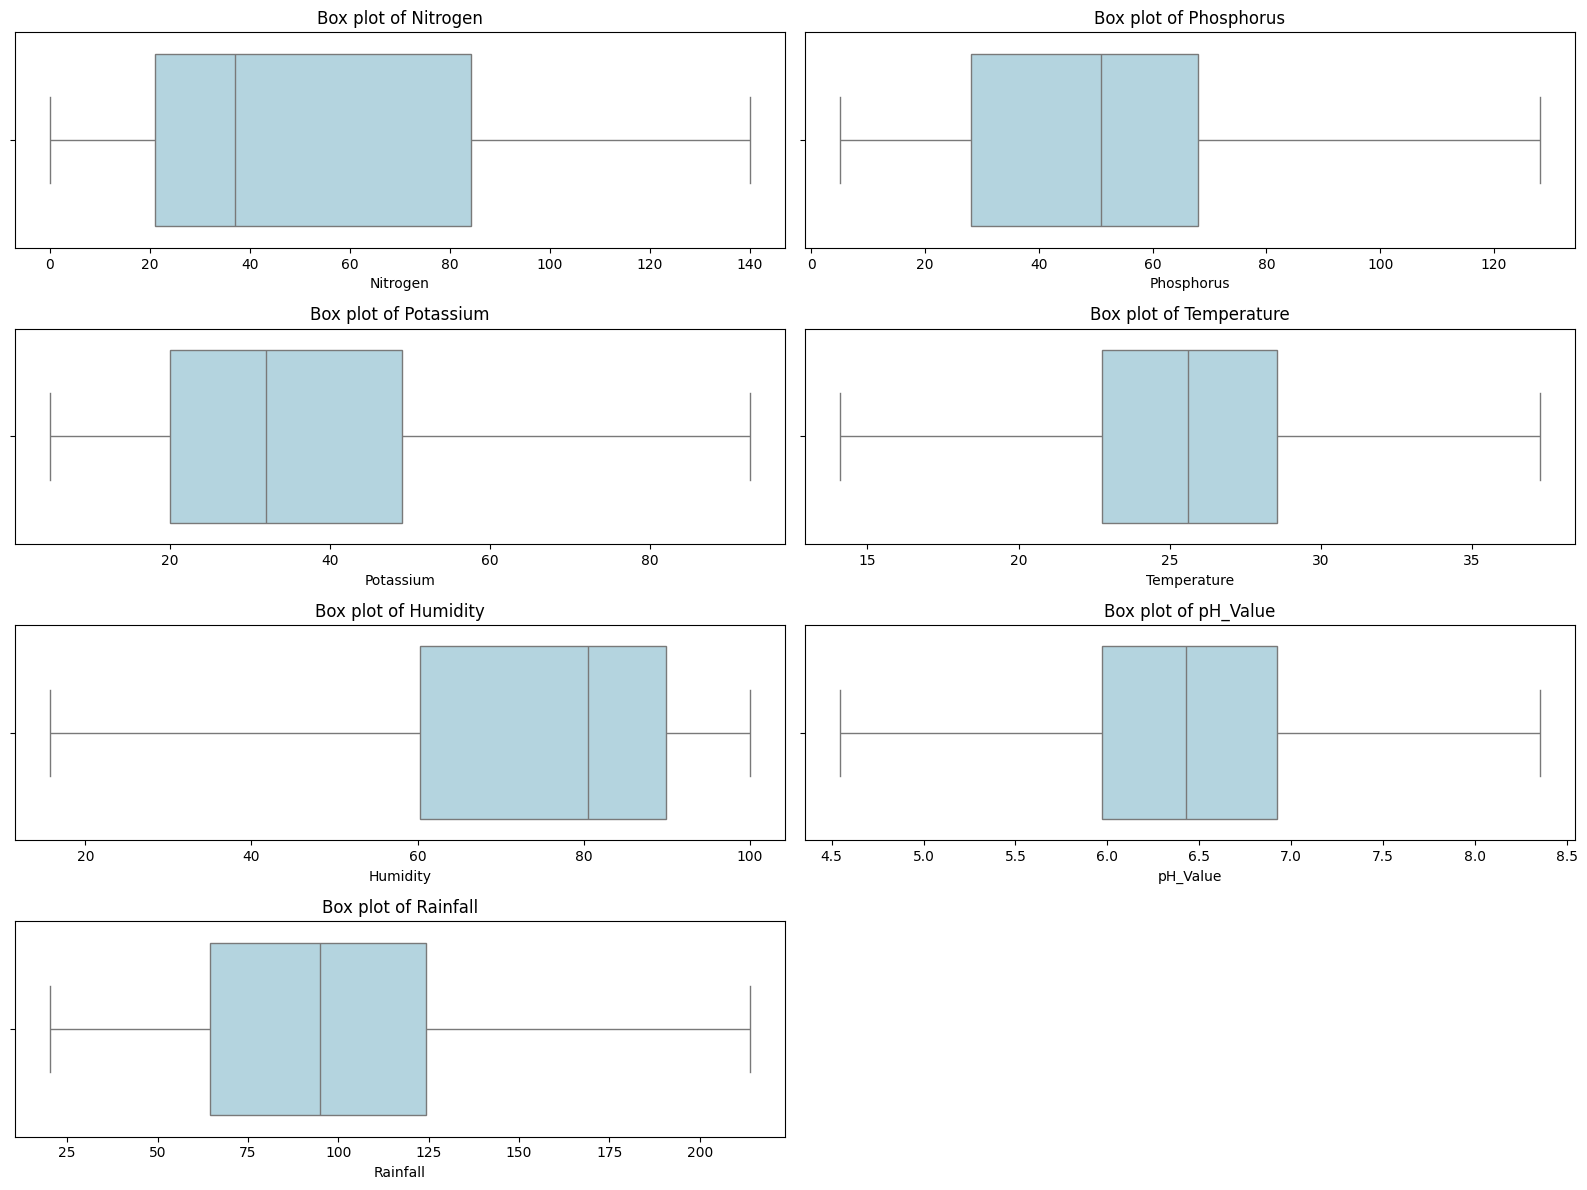

In [16]:
columns_to_visualize = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

num_rows = len(columns_to_visualize) // 2 + len(columns_to_visualize) % 2
num_cols = 2

plt.figure(figsize=(16, 12))

for i, column in enumerate(columns_to_visualize, 1):
    Q1 = Crop_df[column].quantile(0.25)
    Q3 = Crop_df[column].quantile(0.75)
    IQR = Q3 - Q1

    adjusted_values = Crop_df[column].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=adjusted_values, color='lightblue')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Feature Scaling and Normalization

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


columns_to_scale = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

scaled_standard_df = Crop_df.copy()
scaled_standard_df[columns_to_scale] = standard_scaler.fit_transform(Crop_df[columns_to_scale])

scaled_min_max_df = Crop_df.copy()
scaled_min_max_df[columns_to_scale] = min_max_scaler.fit_transform(Crop_df[columns_to_scale])

print("Scaled and Standardized Data (StandardScaler):")
print(scaled_standard_df.head())
print("\nScaled and Normalized Data (MinMaxScaler):")
print(scaled_min_max_df.head())

Scaled and Standardized Data (StandardScaler):
   Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall  \
0  1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868  2.898373   

   Crop  
0  Rice  
1  Rice  
2  Rice  
3  Rice  
4  Rice  

Scaled and Normalized Data (MinMaxScaler):
   Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall  \
0  0.642857    0.264286      0.190     0.345886  0.790267  0.466264  0.656458   
1  0.607143    0.378571      0.180     0.371445  0.770633  0.549480  0.741675   
2  0.428571    0.357143      0.195     0.406854  0.793977  0.674219  0.875710   
3  0.528571    0.214286      0.175    

In [18]:
Crop_df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

crop_mapping = {
    'Rice': 1, 'Maize': 2, 'Jute': 3, 'Cotton': 4, 'Coconut': 5, 'Papaya': 6, 'Orange': 7,
    'Apple': 8, 'Muskmelon': 9, 'Watermelon': 10, 'Grapes': 11, 'Mango': 12, 'Banana': 13,
    'Pomegranate': 14, 'Lentil': 15, 'Blackgram': 16, 'MungBean': 17, 'MothBeans': 18,
    'PigeonPeas': 19, 'KidneyBeans': 20, 'ChickPea': 21, 'Coffee': 22
}

label_encoder = LabelEncoder()
Crop_df['Crop'] = label_encoder.fit_transform(Crop_df['Crop'])
print("Mapping of Crop names to numerical labels:")
for crop, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{crop}: {label}")

print("\nEncoded 'Crop' column:")
print(Crop_df['Crop'])

Mapping of Crop names to numerical labels:
Apple: 0
Banana: 1
Blackgram: 2
ChickPea: 3
Coconut: 4
Coffee: 5
Cotton: 6
Grapes: 7
Jute: 8
KidneyBeans: 9
Lentil: 10
Maize: 11
Mango: 12
MothBeans: 13
MungBean: 14
Muskmelon: 15
Orange: 16
Papaya: 17
PigeonPeas: 18
Pomegranate: 19
Rice: 20
Watermelon: 21

Encoded 'Crop' column:
0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int64


In [20]:
Crop_df.sample(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1040,80,90,47,26.597436,79.358989,6.210845,107.394472,1
319,23,65,20,23.042910,22.426110,5.833940,108.368432,9
176,74,39,23,22.626511,65.774729,6.780736,88.172510,11
2144,87,23,28,26.223674,62.265946,6.979591,193.746197,5
263,22,64,82,19.489743,17.172603,6.474024,87.513128,3
712,52,63,19,29.589490,68.321768,6.928899,67.530212,2
1611,33,12,8,25.260527,90.311537,6.822282,117.369530,16
1450,113,20,48,27.465836,94.876790,6.440585,27.278998,15
1351,90,16,45,24.920933,80.617508,6.291540,50.557108,21
1966,127,53,24,22.215070,76.178519,6.127940,70.405576,6


In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = Crop_df.drop(columns=['Crop'])
y = Crop_df['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scoring = 'accuracy'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

best_params = grid_result.best_params_
best_score = grid_result.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score (Accuracy): 0.996590909090909
Test Accuracy with Best Model: 0.9931818181818182
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    pipelines.append((name, pipeline))

for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)

for name, pipeline in pipelines:
    print(f"\n{name}:")
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion)



Random Forest:
Accuracy: 0.9932
F1 Score: 0.9932
Precision: 0.9937
Recall: 0.9932
Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [

<ipython-input-23-7957ad41d3fb>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

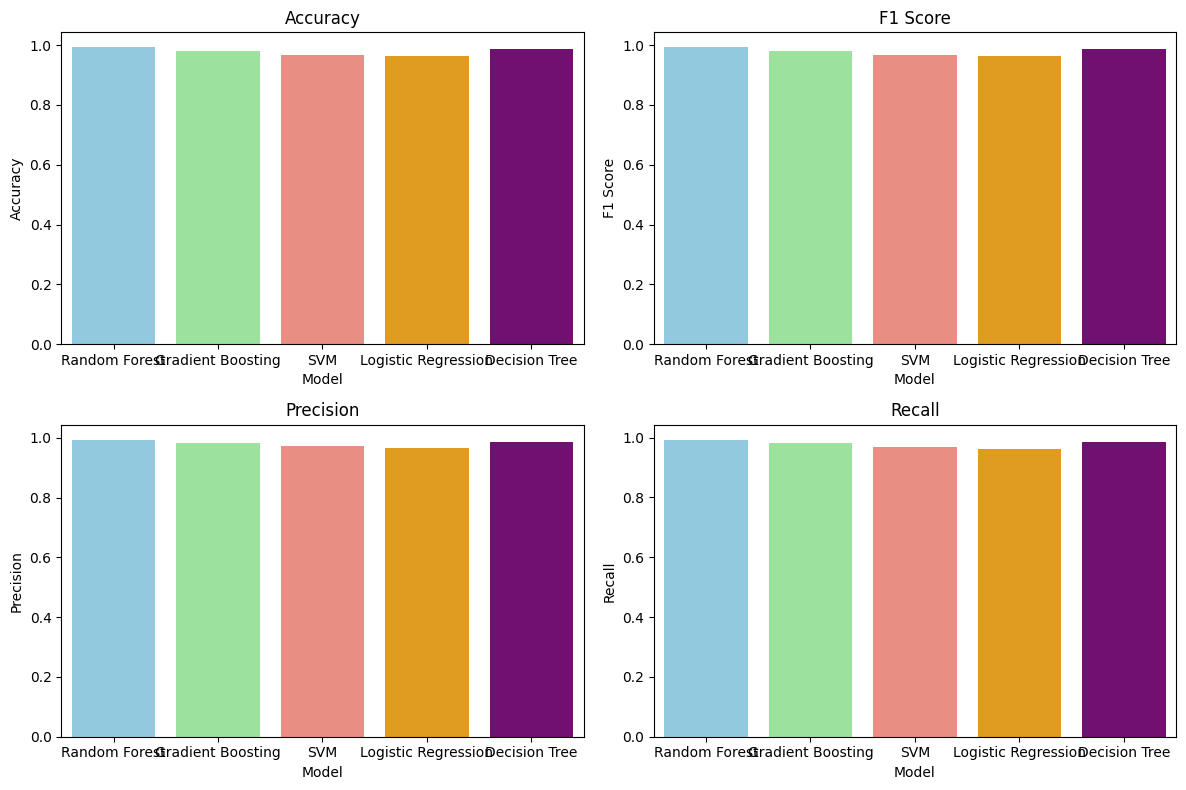

In [23]:
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

model_names = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

for name, pipeline in pipelines:
    model_names.append(name)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=model_names, y=accuracies, palette=colors, legend=False)
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
sns.barplot(x=model_names, y=f1_scores, palette=colors, legend=False)
plt.title('F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.subplot(2, 2, 3)
sns.barplot(x=model_names, y=precisions, palette=colors, legend=False)
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 4)
sns.barplot(x=model_names, y=recalls, palette=colors, legend=False)
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()


The performance of the six machine learning models was evaluated using accuracy, F1 score, precision, recall, and confusion matrix. Here are the results:

- **Random Forest:** Achieved an accuracy of 99.32% with high scores in F1 score (99.32%), precision (99.37%), and recall (99.32%).

- **Gradient Boosting:** Scored slightly lower than Random Forest with an accuracy of 98.18% and slightly lower F1 score (98.19%), precision (98.43%), and recall (98.18%).

- **SVM:** Also performed well with an accuracy of 96.82%, and balanced scores in F1 score (96.80%), precision (97.15%), and recall (96.82%).

- **Logistic Regression:** Achieved an accuracy of 96.36%, with balanced scores in F1 score (96.35%), precision (96.44%), and recall (96.36%).

- **Decision Tree:** Achieved an accuracy of 98.18%, with balanced scores in F1 score (98.18%), precision (98.24%), and recall (98.18%).

The Random Forest model exhibited the highest accuracy and F1 score among all models, making it the most effective in this classification task. However, all models performed well, indicating the suitability of each for this particular problem. Depending on other considerations like computational efficiency and interpretability, one might choose different models.

In [24]:
import os
import pickle

# Train the model (e.g., RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model to the 'model' folder
model_directory = 'model/'
os.makedirs(model_directory, exist_ok=True)  # Create directory if it doesn't exist

model_path = os.path.join(model_directory, 'crop_recommendation_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_path}")


Model saved to model/crop_recommendation_model.pkl
